# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberta a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b>Resposta do aluno</b> <a class="tocSkip"></a>
</div>



<div class="alert alert-block alert-success">
<b>Comentário geral: </b> <a class="tocSkip"></a>

Parabéns pela conclusão do projeto, Heury!👏🚀

O seu trabalho demonstra alta qualidade, com código bem estruturado e comentários relevantes em cada etapa. Os seus gráficos são muito bons! Alta legibilidade e com títulos nos eixos.

Adicionei apenas algumas sugestões que podem contribuir para elevar ainda mais a qualidade do projeto.

O projeto está aprovado! Continue com o excelente trabalho!

</div>

#PROJETO INTEGRADO - SPRINT 6#

In [2]:
#Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind



games_df = pd.read_csv('/datasets/games.csv')

#Verificando os dados

games_df.info()
print()
print(games_df.describe())
print()
games_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

       Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<h3>Análise Inicial e Preparação dos Dados</h3>

A coluna Name tem 2 valores nulos.<br>
A coluna Year_of_Release tem 269 valores nulos.<br>
A coluna Genre tem 2 valores nulos.<br>
A coluna Critic_Score tem valores ausentes em grande parte (8.137 valores presentes).<br>
As colunas User_Score e Rating também têm valores ausentes, com 10.014 e 9.949 entradas presentes, respectivamente.

In [4]:
# Convertendo todos os nomes das colunas para minúsculas e removendo espaços (se houver)
games_df.columns = games_df.columns.str.strip().str.lower()

#visualizando as primeiras linhas
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#convertendo as colunas necessárias e tratando valores ausentes
games_df['year_of_release'] = games_df['year_of_release'].fillna(0).astype(int)
games_df['user_score'] = pd.to_numeric(games_df['user_score'], errors='coerce')

1 - A coluna Year_of_Release deveria ser um número inteiro. Converti os dados para int após tratar os valores nulos, preenchendo com 0 os valores ausentes. <br>
Os valores ausentes podem ocorrido por erro de preenchimento ou pela falta dessa informação. Alguns jogos podem não ter sido lançados oficialmente ou podem ser jogos beta, protótipos ou versões não lançadas, que não têm um ano de lançamento evidente.<br>

2 - A coluna 'user_score' deveria ser numérica (mas estava como object). <br>
Converti os dados para numéricos, substituindo 'TBD' (a ser determinada) por 'NaN', pois 'TBD' não representa um valor numérico, não sendo possível realizar operações númericas, resultando em erros e distorções. <br>
Os valores ausentes aqui podem ter ocorrido por falta de avaliações dos usuários, <br>
ou ainda o sistema de avaliação pode ter mudado ao longo dos anos, em algumas plataformas.<br>



<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Concordo com as respostas do aluno
</div>

In [6]:
#Calculando o total de vendas ( soma das vendas em todas as regiões) para cada jogo e colocando esses valores em uma coluna separada
games_df['total_sales'] = games_df['eu_sales'] = games_df['jp_sales'] + games_df['na_sales'] + games_df['other_sales']

#verificando as primeiras 10 linhas do dataframe
games_df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,53.58,3.77,8.45,76.0,8.0,E,53.58
1,Super Mario Bros.,NES,1985,Platform,29.08,36.66,6.81,0.77,NaN,NaN,NaN,36.66
2,Mario Kart Wii,Wii,2008,Racing,15.68,22.76,3.79,3.29,82.0,8.3,E,22.76
3,Wii Sports Resort,Wii,2009,Sports,15.61,21.84,3.28,2.95,80.0,8.0,E,21.84
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,22.49,10.22,1.00,NaN,NaN,NaN,22.49
5,Tetris,GB,1989,Puzzle,23.20,28.00,4.22,0.58,NaN,NaN,NaN,28.00
6,New Super Mario Bros.,DS,2006,Platform,11.28,20.66,6.50,2.88,89.0,8.5,E,20.66
7,Wii Play,Wii,2006,Misc,13.96,19.73,2.93,2.84,58.0,6.6,E,19.73
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,21.38,4.70,2.24,87.0,8.4,E,21.38
9,Duck Hunt,NES,1984,Shooter,26.93,27.68,0.28,0.47,NaN,NaN,NaN,27.68


In [7]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Todas as etapas de processamento de dados realizadas com sucesso.
</div>

<h3> ANÁLISE DE DADOS </h3>

In [8]:
# Contando o número de jogos lançados por ano
games_per_year = games_df['year_of_release'].value_counts().sort_index()

# Exibindo os jogos lançados por ano
games_per_year

0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

A partir dos dados acima, podemos observar que:<br>

1 -  Os anos iniciais (1980-1994) têm poucos jogos registrados por ano (menos de 50, na maioria dos casos).<br>
2 - A partir de 1995, há um aumento significativo no número de lançamentos anuais, atingindo um pico entre 2002 e 2015,<br>
com centenas de jogos registrados anualmente.<br>

Preliminarmente, podemos considerar que o número reduzido de jogos antes de 1995 podem ser menos representativos e confiáveis para tendências, podendo ser até irrelevantes para análises preditivas voltadas para 2017, devido a tecnologias obsoletas e padrões de mercado muito diferentes.<br>



<h3>1 - Jogos lançados em anos diferentes e filtragem de dados relevantes (1995-2016)</h3>


Jogos lançados por ano (1995-2016):
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64


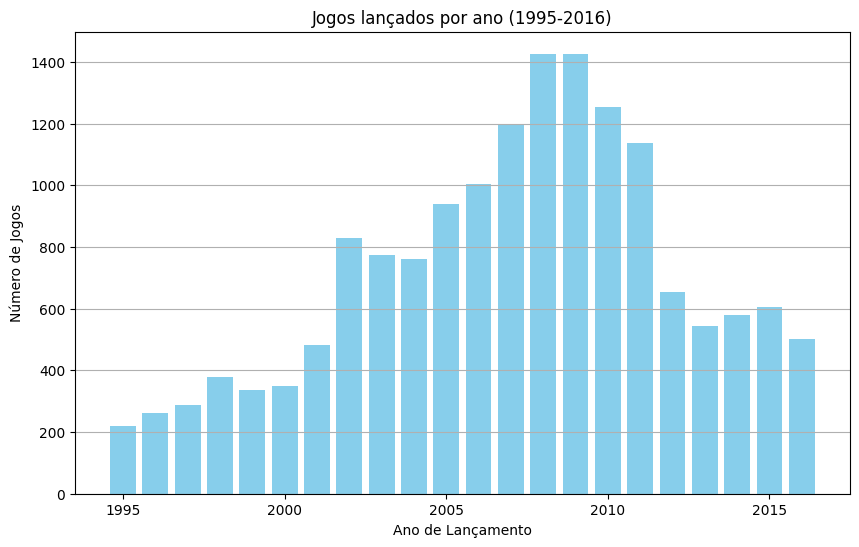

In [9]:
# Filtrando os dados entre 1995 e 2016
filtered_data = games_df[(games_df['year_of_release'] >= 1995) & (games_df['year_of_release'] <= 2016)]

# Exibindo o número de lançamentos por ano após o filtro
filtered_yearly_releases = filtered_data['year_of_release'].value_counts().sort_index()

print("Jogos lançados por ano (1995-2016):")
print(filtered_yearly_releases)

# Gerando o gráfico para lançamentos por ano
plt.figure(figsize=(10, 6))
plt.bar(filtered_yearly_releases.index, filtered_yearly_releases.values, color='skyblue')
plt.title('Jogos lançados por ano (1995-2016)')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos')
plt.grid(axis='y')
plt.show()




Observa-se um crescimento constante no número de jogos lançados até o pico em 2008-2009.<br>
Após 2009, o número de lançamentos começou a cair gradualmente.<br>
O período entre 2005 e 2010 parece ser a "era dourada" dos lançamentos de jogos.<br>
A queda após 2009 pode estar relacionada a mudanças no mercado, como aumento da concorrência, avanço de jogos digitais ou o surgimento de novas plataformas.

<div class="alert alert-block alert-warning">

<b>Comentário: </b> <a class="tocSkip"></a>

Dica: É raro utilizar dados de mais de 2-3 anos para prever as vendas do próximo ano, mesmo em negócios tradicionais. Na indústria dinâmica de jogos de computador, evitar períodos mais longos é ainda mais importante, pois você pode acabar rastreando tendências obsoletas. No entanto, também não é aconselhável usar um período muito curto. **O ideal seria usar um intervalo de 2-3 anos, como 2014-2016, 2015-2016 ou 2013-2016.** Vi que você criou o dataframe `recent_sales`com o período temporal mais recente. Esse seria o dataframe mais adequado para realizar as análises e testes de hipótese.
</div>

<h3>2 - Variação de vendas por plataforma</h3>


Distribuição de vendas por plataforma por ano:
platform             DS     PS2     PS3     Wii    X360
year_of_release                                        
2000                NaN   28.53     NaN     NaN     NaN
2001                NaN  114.06     NaN     NaN     NaN
2002                NaN  140.11     NaN     NaN     NaN
2003                NaN  123.11     NaN     NaN     NaN
2004              13.34  155.80     NaN     NaN     NaN
2005              88.65  119.80     NaN     NaN    7.82
2006              96.74   81.81   13.58   93.53   40.78
2007             113.15   65.56   47.09  108.81   73.24
2008             113.07   46.27   79.79  124.80   97.10
2009              93.71   21.46   89.53  148.66   86.98
2010              66.20    4.10   91.67   91.64  123.72
2011              20.47    0.32  100.54   41.97  101.26
2012               8.33     NaN   68.31   15.72   67.74
2013               0.69     NaN   70.98    5.25   61.55
2014                NaN     NaN   29.52    1.89   23.46
2

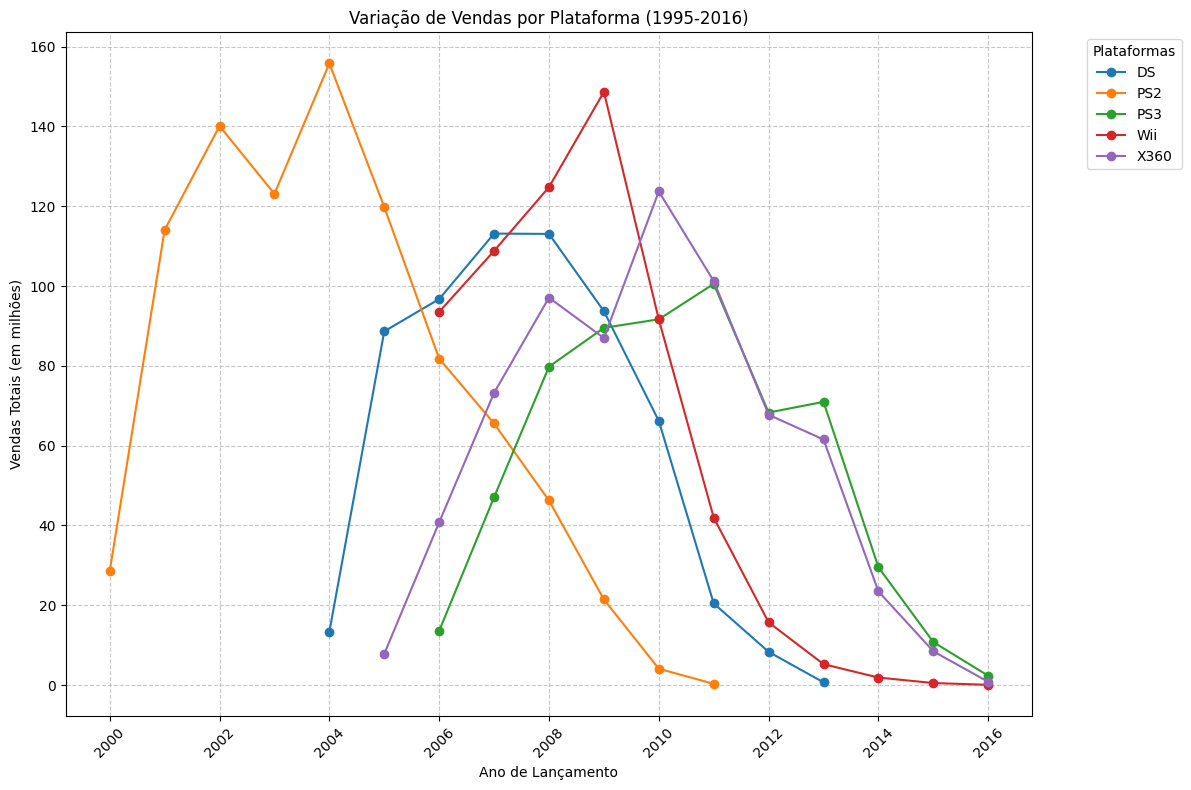

In [10]:
# Calculando as vendas totais por plataforma
platform_sales = filtered_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Selecionando as plataformas com as maiores vendas totais
top_platforms = platform_sales.head(5).index

# Filtrando dados para as plataformas selecionadas
top_platform_data = filtered_data[filtered_data['platform'].isin(top_platforms)]

# Distribuição de vendas por plataforma por ano
platform_sales_yearly = top_platform_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

print("Distribuição de vendas por plataforma por ano:")
print(platform_sales_yearly)


# Gerando o gráfico para variação de vendas por plataforma ao longo dos anos
platform_sales_yearly.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Variação de Vendas por Plataforma (1995-2016)')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais (em milhões)')
plt.legend(title='Plataformas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

As vendas por plataforma parecem seguir curvas definidas:<br>
PS2 (em laranja) domina em seu período de pico, com vendas significativas.<br>
Wii (em vemelho) também mostra um pico elevado, mas em um período mais curto.<br>
Xbox 360 (em roxo) e PS3 (em verde) têm vendas consistentes, com quedas suaves após o pico.<br>
A queda geral nas vendas após 2010 é visível, indicando a saturação ou transição do mercado.<br>

<h3>3 - Plataformas populares e ciclo de vida</h3>


Ciclo de vida das plataformas:
           min   max  lifespan
platform                      
3DO       1995  1995         0
3DS       2011  2016         5
DC        1998  2008        10
DS        2004  2013         9
GB        1995  2001         6
GBA       2000  2007         7
GC        2001  2007         6
N64       1996  2002         6
NG        1995  1996         1
PC        1995  2016        21
PCFX      1996  1996         0
PS        1995  2003         8
PS2       2000  2011        11
PS3       2006  2016        10
PS4       2013  2016         3
PSP       2004  2015        11
PSV       2011  2016         5
SAT       1995  1999         4
SNES      1995  1999         4
TG16      1995  1995         0
WS        1999  2001         2
Wii       2006  2016        10
WiiU      2012  2016         4
X360      2005  2016        11
XB        2000  2008         8
XOne      2013  2016         3


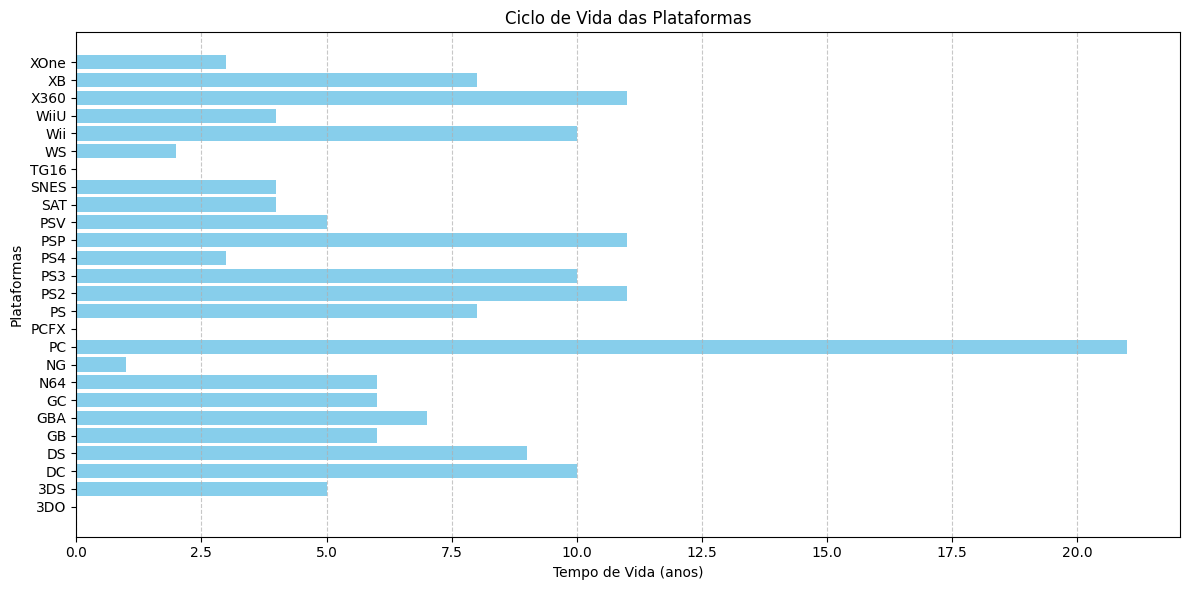

In [11]:
# Identificando a primeira e a última aparição de cada plataforma
platform_lifespan = filtered_data.groupby('platform')['year_of_release'].agg(['min', 'max'])

# Identificando plataformas que não têm vendas recentes (após 2015)
inactive_platforms = platform_lifespan[platform_lifespan['max'] < 2016]

# Calculando o tempo de vida das plataformas
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']

print("Ciclo de vida das plataformas:")
print(platform_lifespan)

# Gerando o gráfico para o ciclo de vida das plataformas
plt.figure(figsize=(12, 6))
plt.barh(platform_lifespan.index, platform_lifespan['lifespan'], color='skyblue')
plt.title('Ciclo de Vida das Plataformas')
plt.xlabel('Tempo de Vida (anos)')
plt.ylabel('Plataformas')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()



Podemos observar que algumas plataformas, como PC, têm um ciclo de vida muito mais longo (mais de 20 anos), o que reflete sua relevância contínua.<br>
Plataformas como PS2, Wii, e DS também tiveram ciclos de vida relativamente longos e bem-sucedidos.<br>
Outras plataformas, como 3DO e NG, têm ciclos de vida curtos, indicando baixa adoção ou suporte limitado.<br>

In [12]:
print("Plataformas inativas (após 2015):")
print(inactive_platforms)

Plataformas inativas (após 2015):
           min   max
platform            
3DO       1995  1995
DC        1998  2008
DS        2004  2013
GB        1995  2001
GBA       2000  2007
GC        2001  2007
N64       1996  2002
NG        1995  1996
PCFX      1996  1996
PS        1995  2003
PS2       2000  2011
PSP       2004  2015
SAT       1995  1999
SNES      1995  1999
TG16      1995  1995
WS        1999  2001
XB        2000  2008


<h3>4 - Plataformas líderes e tendências</h3>


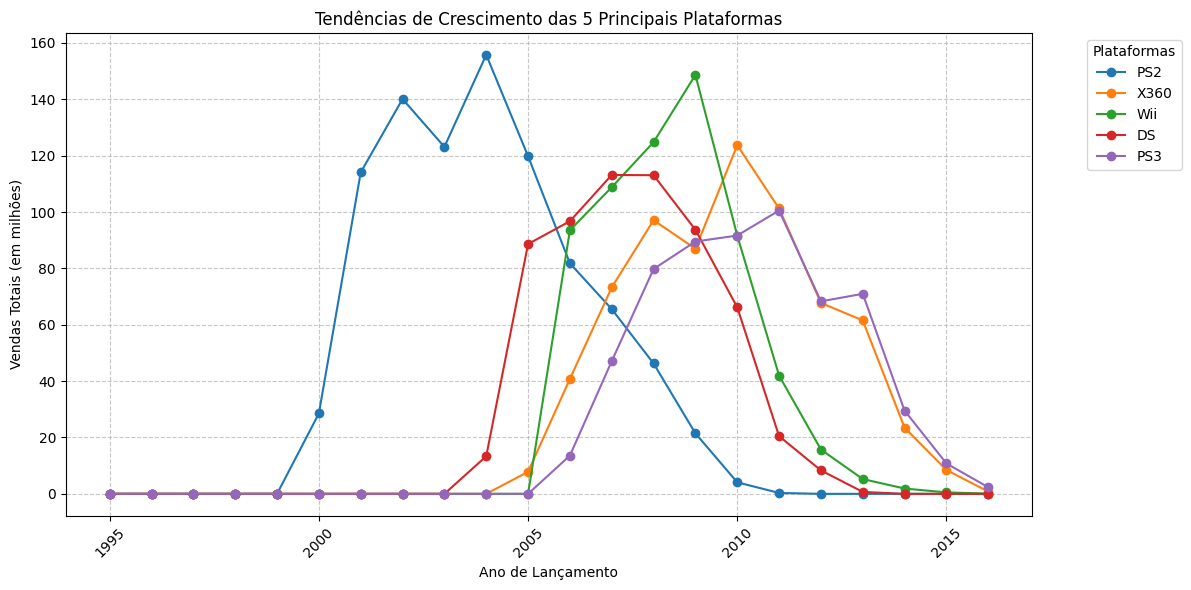

In [13]:
# Calculando as vendas anuais para cada plataforma
platform_trends = filtered_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack(fill_value=0)

# Selecionando as 5 plataformas líderes em vendas totais
platform_sales = filtered_data.groupby('platform')['total_sales'].sum()  # Total de vendas por plataforma
top_5_platforms_leaders = platform_sales.sort_values(ascending=False).head(5).index

# Filtrando os dados para essas plataformas
top_5_platform_trends = platform_trends.loc[top_5_platforms_leaders]

# Gerando o gráfico para tendências de crescimento das 5 principais plataformas
plt.figure(figsize=(12, 6))
for platform in top_5_platform_trends.index:
    plt.plot(top_5_platform_trends.columns, top_5_platform_trends.loc[platform], marker='o', label=platform)

plt.title('Tendências de Crescimento das 5 Principais Plataformas')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais (em milhões)')
plt.xticks(rotation=45)
plt.legend(title='Plataformas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

O gráfico confirma que as plataformas PS2, Wii, e DS tiveram um impacto significativo, com vendas crescendo rapidamente e depois caindo.<br>
Xbox 360 e PS3 mostram uma curva de crescimento mais sustentada, mas com declínio nos últimos anos.<br>
As tendências sugerem que o mercado foi dominado por um número limitado de plataformas em ciclos definidos (5 a 10 anos).<br>

<Figure size 1000x600 with 0 Axes>

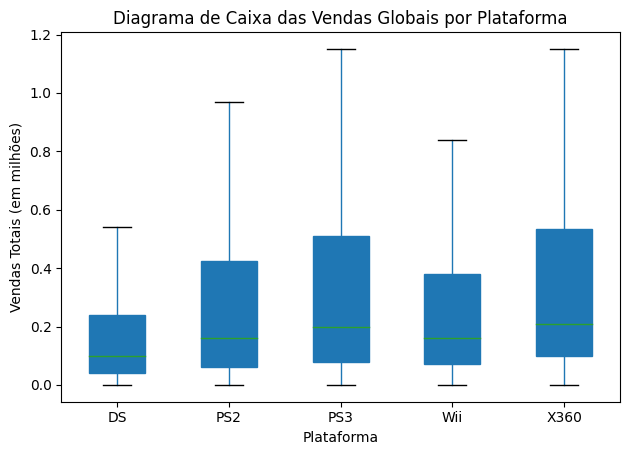

In [14]:
# Filtrando dados das 5 plataformas líderes para o diagrama de caixa
top_5_platforms_data = filtered_data[filtered_data['platform'].isin(top_5_platforms_leaders)]

# Construir o diagrama de caixa para vendas globais
plt.figure(figsize=(10, 6))
top_5_platforms_data.boxplot(column='total_sales', by='platform', grid=False, showfliers=False, patch_artist=True)

# Ajustar título e rótulos
plt.title('Diagrama de Caixa das Vendas Globais por Plataforma')
plt.suptitle('')  # Remove o título padrão gerado pelo boxplot
plt.xlabel('Plataforma')
plt.ylabel('Vendas Totais (em milhões)')
plt.tight_layout()

# Exibir o gráfico
plt.show()

A mediana (linha verde) está variando significativamente entre as plataformas:<br>
Wii parece ter vendas mais altas na mediana, sugerindo um desempenho consistente.<br>
DS possui a mediana mais baixa entre as cinco plataformas, indicando vendas globais mais modestas na maioria dos jogos.<br>
As plataformas PS2, PS3, e X360 têm medianas intermediárias, mas relativamente próximas entre si.<br>
As plataformas PS2, Wii, e X360 apresentam "bigodes" superiores mais longos, indicando que algumas de suas vendas chegaram a valores altos, possivelmente impulsionadas por grandes títulos ou séries populares.<br>
Wii e PS2 se destacam em termos de vendas consistentes, com mais jogos atingindo vendas acima da média.<br>

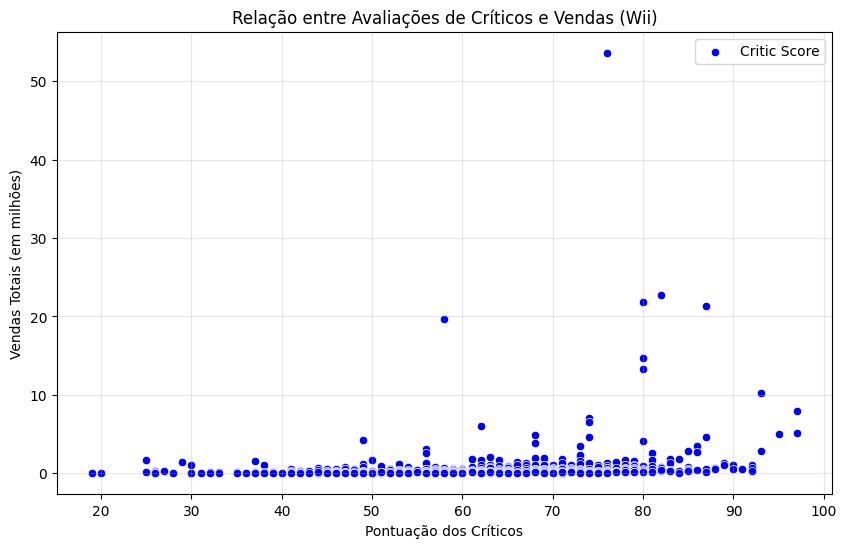

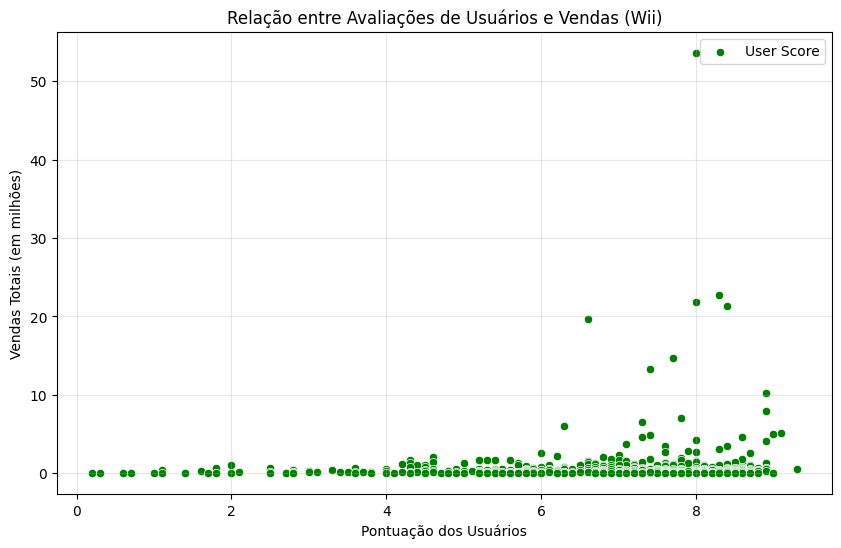

Correlação entre Critic_Score e Vendas Totais (Wii): 0.18
Correlação entre User_Score e Vendas Totais (Wii): 0.12


In [15]:
# Filtrando os dados para a plataforma Wii
wii_data = filtered_data[filtered_data['platform'] == 'Wii']

# Construindo o gráfico de dispersão para Critic_Score e Vendas Totais
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wii_data, x='critic_score', y='total_sales', color='blue', label='Critic Score')
plt.title('Relação entre Avaliações de Críticos e Vendas (Wii)')
plt.xlabel('Pontuação dos Críticos')
plt.ylabel('Vendas Totais (em milhões)')
plt.grid(alpha=0.3)
plt.legend()
plt.savefig('dispersao_critic_score_vendas.png', format='png', dpi=300)

plt.show()

# Construindo o gráfico de dispersão para User_Score e Vendas Totais
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wii_data, x='user_score', y='total_sales', color='green', label='User Score')
plt.title('Relação entre Avaliações de Usuários e Vendas (Wii)')
plt.xlabel('Pontuação dos Usuários')
plt.ylabel('Vendas Totais (em milhões)')
plt.grid(alpha=0.3)
plt.legend()
plt.savefig('dispersao_user_score_vendas.png', format='png', dpi=300)
plt.show()

# Calculando a correlação entre Critic_Score e Vendas Totais
correlation_critic = wii_data[['critic_score', 'total_sales']].corr().iloc[0, 1]

# Calculando a correlação entre User_Score e Vendas Totais
correlation_user = wii_data[['user_score', 'total_sales']].corr().iloc[0, 1]

# Exibir correlações
print(f"Correlação entre Critic_Score e Vendas Totais (Wii): {correlation_critic:.2f}")
print(f"Correlação entre User_Score e Vendas Totais (Wii): {correlation_user:.2f}")

A dispersão indica que há uma leve tendência de maior pontuação dos críticos associada a maiores vendas.<br>
Mas não é um fator determinante.A correlação é positiva, mas muito fraca.<br>
A relação entre as avaliações dos usuários e as vendas parece ser menos significativa do que a dos críticos.<br> A correlação é ainda mais fraca do que a dos críticos, sugerindo que as avaliações dos usuários têm um impacto muito limitado nas vendas.


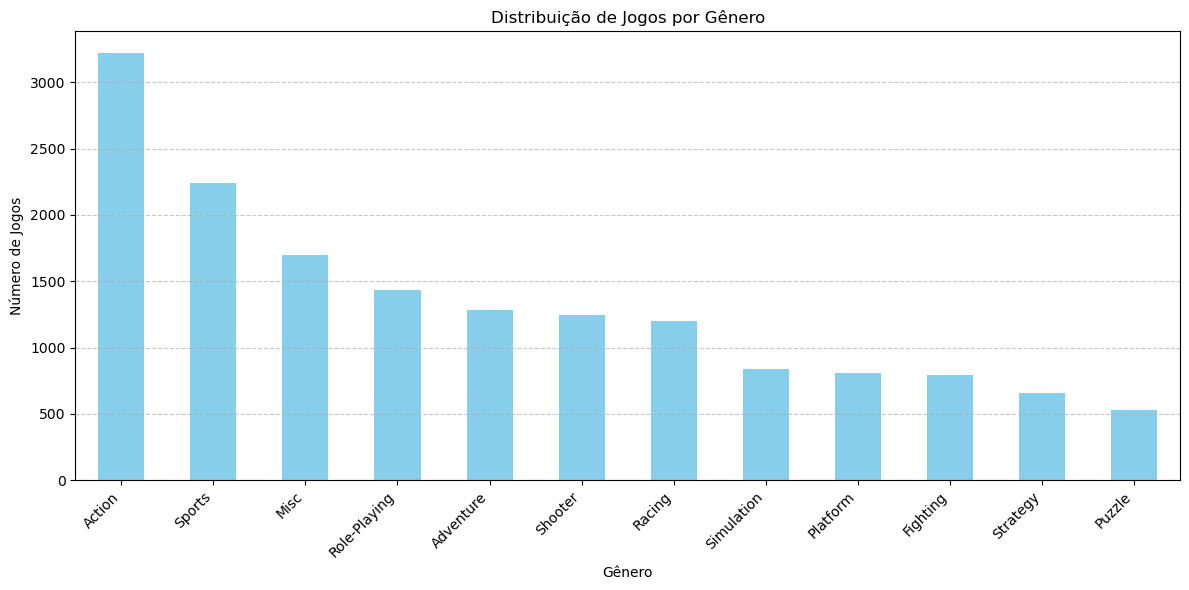

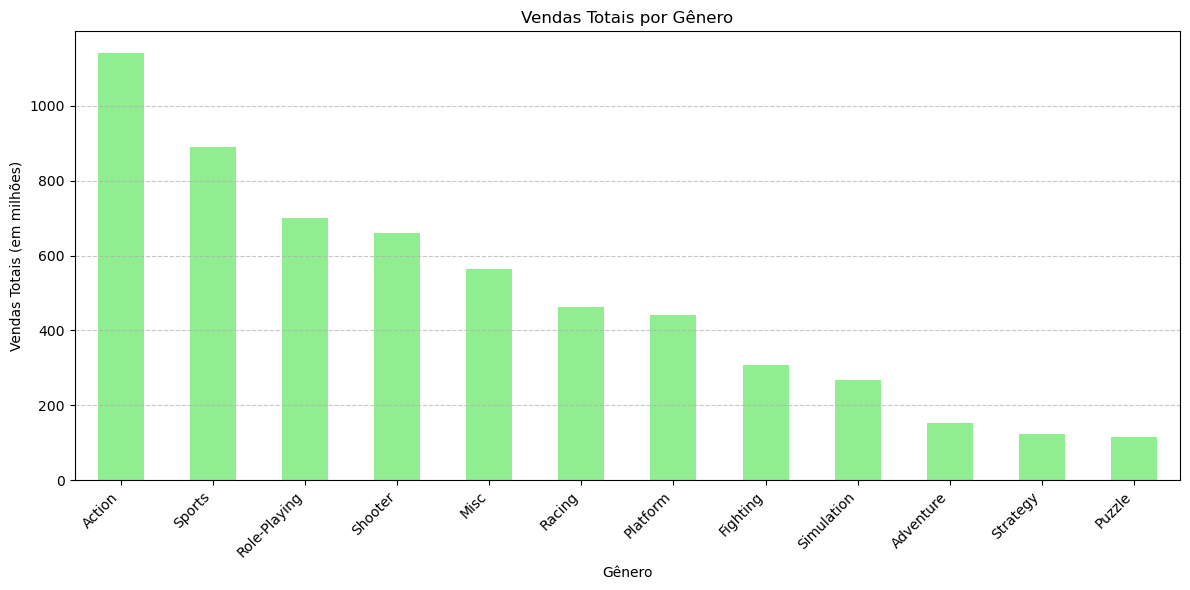

Vendas Totais por Gênero:
genre
Action          1141.72
Sports           890.98
Role-Playing     700.39
Shooter          659.71
Misc             564.79
Racing           462.09
Platform         441.80
Fighting         308.07
Simulation       267.35
Adventure        153.50
Strategy         123.22
Puzzle           115.63
Name: total_sales, dtype: float64


In [79]:
# Agrupando por gênero e calculando as vendas totais
genre_sales = filtered_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Contando o número de jogos por gênero
genre_counts = filtered_data['genre'].value_counts()

# Criando um gráfico de barras para a distribuição de jogos por gênero
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Jogos por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Número de Jogos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('distribuicao_genero.png', format='png', dpi=300)
plt.show()

# Criando um gráfico de barras para os gêneros mais lucrativos
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='lightgreen')
plt.title('Vendas Totais por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas Totais (em milhões)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('vendas_genero.png', format='png', dpi=300)

plt.show()

# Exibindo os gêneros mais lucrativos
print("Vendas Totais por Gênero:")
print(genre_sales)

Pelas análises dos gráficos, podemos notar que os gêneros "Action" e "Sports" lideram tanto em quantidade de jogos quanto em vendas totais. Eles possuem apelo massivo, atendendo tanto a públicos casuais quanto hardcore. Exemplos de sucesso incluem franquias como "FIFA" (Sports) e "Grand Theft Auto" (Action).<br>
Os gêneros "Role-Playing (RPG)" e "Shooter", embora tenham menos lançamentos em comparação com Action e Sports, parecem ser consistentemente lucrativos.<br>
Os jogos nesses gêneros tendem a ser de alta qualidade, com grande foco em histórias, multiplayer e marketing.<br>
Dentre os gêneros com vendas mais baixas estão "Puzzle" e "Strategy". Esses gêneros têm as menores vendas e a menor quantidade de lançamentos.<br>
São nichos que atendem a públicos específicos, geralmente mais focados em experiências intelectuais ou desafiadoras.

<h3>5 - As cinco principais plataformas por região</h3>

In [80]:
# Calculando as vendas totais por plataforma para cada região
platform_sales_na = filtered_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
platform_sales_eu = filtered_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
platform_sales_jp = filtered_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

# Selecionando as cinco principais plataformas em cada região
top_5_platforms_na = platform_sales_na.head(5)
top_5_platforms_eu = platform_sales_eu.head(5)
top_5_platforms_jp = platform_sales_jp.head(5)

# Exibindo as cinco principais plataformas por região
print("Top 5 plataformas na América do Norte:")
print(top_5_platforms_na)
print("\nTop 5 plataformas na Europa:")
print(top_5_platforms_eu)
print("\nTop 5 plataformas no Japão:")
print(top_5_platforms_jp)

Top 5 plataformas na América do Norte:
platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64

Top 5 plataformas na Europa:
platform
PS2     900.93
X360    692.92
Wii     632.86
DS      614.35
PS3     604.13
Name: eu_sales, dtype: float64

Top 5 plataformas no Japão:
platform
DS     175.00
PS2    137.54
PS     137.11
3DS    100.62
PS3     79.41
Name: jp_sales, dtype: float64


Na América do Norte, o lider absoluto é a plataforma XBOX 360, indicando alta popularidade dos consoles da Microsoft.<br>
Na Europa a liderança fica com a plataforma PS2,  sendo quase 30% maior do que o segundo lugar (XBOX 360).<br>
Já no Japão, a DS apresenta vendas muito superiores às demais plataformas.<br>
América do Norte e Europa possuem tendências semelhantes (Xbox 360, PS2, e Wii) enquanto o Japão se diferencia com aparente foco em <br>consoles portáteis (DS e 3DS) e uma forte fidelidade à Sony (PS, PS2, PS3).<br>

<h3>6 -  Quotas de mercado das plataformas por região</h3>

In [84]:
# Calculando a porcentagem de mercado para as cinco principais plataformas em cada região
top_5_platforms_na_pct = (top_5_platforms_na / platform_sales_na.sum()) * 100
top_5_platforms_eu_pct = (top_5_platforms_eu / platform_sales_eu.sum()) * 100
top_5_platforms_jp_pct = (top_5_platforms_jp / platform_sales_jp.sum()) * 100

# Exibindo as quotas de mercado
print("\nQuotas de mercado - América do Norte:")
print(top_5_platforms_na_pct)
print("\nQuotas de mercado - Europa:")
print(top_5_platforms_eu_pct)
print("\nQuotas de mercado - Japão:")
print(top_5_platforms_jp_pct)


Quotas de mercado - América do Norte:
platform
X360    14.929443
PS2     14.357566
Wii     12.201124
PS3      9.776788
DS       9.530695
Name: na_sales, dtype: float64

Quotas de mercado - Europa:
platform
PS2     15.455333
X360    11.886949
Wii     10.856628
DS      10.539092
PS3     10.363769
Name: eu_sales, dtype: float64

Quotas de mercado - Japão:
platform
DS     16.351167
PS2    12.851083
PS     12.810906
3DS     9.401454
PS3     7.419692
Name: jp_sales, dtype: float64


Pelas análises confirmamos que:<br>
América do Norte: Xbox 360 lidera.<br>
Europa: PS2 domina com ampla vantagem.<br>
Japão: DS é claramente a plataforma mais popular.<br>

Xbox 360:<br>
Tem forte presença na América do Norte e Europa, mas nenhuma no Japão.<br>
Isso destaca as diferenças culturais e preferências por marcas locais no Japão.<br>

Consoles Portáteis:<br>
O DS e o 3DS são altamente relevantes no Japão, mas têm uma participação menor na América do Norte e Europa.

<h3>7. Os cinco principais gêneros por região</h3>

In [85]:
# Calculando as vendas totais por gênero para cada região
genre_sales_na = filtered_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
genre_sales_eu = filtered_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
genre_sales_jp = filtered_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

# Selecionando os cinco principais gêneros em cada região
top_5_genres_na = genre_sales_na.head(5)
top_5_genres_eu = genre_sales_eu.head(5)
top_5_genres_jp = genre_sales_jp.head(5)

# Exibindo os cinco principais gêneros por região
print("\nTop 5 gêneros na América do Norte:")
print(top_5_genres_na)
print("\nTop 5 gêneros na Europa:")
print(top_5_genres_eu)
print("\nTop 5 gêneros no Japão:")
print(top_5_genres_jp)


Top 5 gêneros na América do Norte:
genre
Action     814.11
Sports     655.07
Shooter    527.59
Misc       392.43
Racing     342.82
Name: na_sales, dtype: float64

Top 5 gêneros na Europa:
genre
Action          1141.72
Sports           890.98
Role-Playing     700.39
Shooter          659.71
Misc             564.79
Name: eu_sales, dtype: float64

Top 5 gêneros no Japão:
genre
Role-Playing    315.17
Action          146.46
Sports          104.31
Misc             99.51
Platform         77.05
Name: jp_sales, dtype: float64


Com base nos números, podemos deduzir que:<br>
Na América do Norte a preferências está por Jogos de ação, esportes e tiro. Indicando uma preferência por competitividade e casualidade.<br>
Já na Europa o público possui um gosto diversificado, com forte presença de ação, esportes e RPGs.<br>
E o mercado japonês está altamente voltado para RPGs e plataformas, refletindo uma cultura de jogos portáteis e histórias imersivas.<br>

<h3>8. Impacto das classificações ESRB nas vendas por região</h3>


In [86]:
# Calculando as vendas totais por classificação ESRB para cada região
esrb_sales_na = filtered_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = filtered_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = filtered_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Exibir as vendas totais por classificação ESRB para cada região
print("\nImpacto da classificação ESRB - América do Norte:")
print(esrb_sales_na)
print("\nImpacto da classificação ESRB - Europa:")
print(esrb_sales_eu)
print("\nImpacto da classificação ESRB - Japão:")
print(esrb_sales_jp)


Impacto da classificação ESRB - América do Norte:
rating
E       1274.24
T        747.19
M        742.87
E10+     345.50
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64

Impacto da classificação ESRB - Europa:
rating
E       1703.74
T       1050.26
M        982.51
E10+     457.62
K-A        4.05
EC         1.64
AO         1.35
RP         0.01
Name: eu_sales, dtype: float64

Impacto da classificação ESRB - Japão:
rating
E       197.96
T       150.17
M        63.58
E10+     40.20
K-A       1.46
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64


Pelos números percebemos que: <br>
O mercado norte-americano é fortemente dominado por jogos para todas as idades (E), <br>
mas há uma boa representação de jogos para públicos mais maduros (T e M).<br>
Classificações mais restritivas (AO) têm pouco impacto, possivelmente devido à distribuição limitada.<br>
<br>
Semelhante à América do Norte, a Europa favorece jogos para todas as idades (E) e tem uma base sólida <br>
de consumidores para jogos adolescentes (T) e maduros (M).<br>
<br>
Já o mercado japonês é dominado por jogos para todas as idades (E) e tem pouca aceitação para jogos voltados <br>
para públicos mais maduros (Mature).<br>
O foco em jogos voltados para públicos mais jovens e familiares reflete as preferências culturais no Japão.


<h3>9 - Testando hipóteses</h3>

<h5>9.1 - Hipótese 1: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.</h5>
Hipótese nula: As classificações médias dos usuários para Xbox One e PC são iguais.<br>
Hipótese alternativa: As classificações médias dos usuários para Xbox One e PC são diferentes.

Usaremos o teste t para amostras independentes:<br>
É apropriado porque as classificações do Xbox One e PC vêm de grupos distintos de jogos.
Limiar Alfa (α)<br>
Definiremos α = 0.05 (5%):<br>
Um padrão comum para rejeitar a hipótese nula.
Significa que há 5% de chance de rejeitar a Hipótese nula erroneamente (erro tipo I).<br>


In [15]:
# Filtrando os dados para Xbox One e PC
xbox_one_data = filtered_data[filtered_data['platform'] == 'XOne']['user_score'].dropna()
pc_data = filtered_data[filtered_data['platform'] == 'PC']['user_score'].dropna()

# Teste t para Xbox One vs PC
t_stat_1, p_value_1 = ttest_ind(xbox_one_data, pc_data, equal_var=False)

print("Hipótese 1: Xbox One vs PC")
print(f"T-Estatística: {t_stat_1:.2f}, P-Valor: {p_value_1:.4f}")
if p_value_1 < 0.05:
    print("Rejeitamos a hipótese nula: As médias são significativamente diferentes.")
else:
    print("Falhamos em rejeitar a hipótese nula: Não há diferença significativa.")

Hipótese 1: Xbox One vs PC
T-Estatística: -4.73, P-Valor: 0.0000
Rejeitamos a hipótese nula: As médias são significativamente diferentes.


<h5>9.2 - Hipótese 2: As classificações médias dos usuários para os gêneros Action e Sports são diferentes.</h5>
Hipótese nula: As classificações médias dos usuários para os gêneros Action e Sports são iguais.<br>
Hipótese alternativa: As classificações médias dos usuários para os gêneros Action e Sports são diferentes.<br>
Usaremos o teste t para amostras independentes, pelos mesmos motivos da hipótese 1.<br>
Também definiremos α = 0.05 para manter consistência e controlar o risco de erro tipo I.<br>




In [16]:
# Filtrando os dados para Action e Sports
action_data = filtered_data[filtered_data['genre'] == 'Action']['user_score'].dropna()
sports_data = filtered_data[filtered_data['genre'] == 'Sports']['user_score'].dropna()

# Testando t para Action vs Sports
t_stat_2, p_value_2 = ttest_ind(action_data, sports_data, equal_var=False)

print("\nHipótese 2: Action vs Sports")
print(f"T-Estatística: {t_stat_2:.2f}, P-Valor: {p_value_2:.4f}")
if p_value_2 < 0.05:
    print("Rejeitamos a hipótese nula: As médias são significativamente diferentes.")
else:
    print("Falhamos em rejeitar a hipótese nula: Não há diferença significativa.")


Hipótese 2: Action vs Sports
T-Estatística: 1.79, P-Valor: 0.0737
Falhamos em rejeitar a hipótese nula: Não há diferença significativa.


<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

- Ambos os testes foram realizados corretamente! 

- Comentários foram adicionados com as observações do aluno

</div>

<h3>10 - Resumo das Análises sobre o Dataset de Games</h3>
Analisamos o dataset de vendas de jogos, incluindo aspectos de plataformas, gêneros, regiões e classificações e obtivemos as seguintes conclusões:<br>

1 - As plataformas PS2, Xbox 360, e Wii foram as mais lucrativas globalmente, com variações regionais.<br>
A América do Norte favorece o Xbox 360, enquanto a Europa e o Japão têm forte inclinação pela marca PlayStation.<br>
O Japão mostrou uma clara preferência por consoles portáteis como DS e 3DS.<br>
<br>
2 - Em relação aos gêneros, vimos que Action e Sports dominaram globalmente, com forte presença na América do Norte e Europa.<br>
No Japão, Role-Playing liderou, refletindo a cultura de RPGs no mercado local.<br>
Gêneros como Shooter tiveram relevância apenas na América do Norte e Europa.<br>
<br>
3 - Jogos classificados como E (Everyone) lideraram as vendas globalmente, com T (Teen) e M (Mature) sendo relevantes na América do Norte e Europa.<br>
O Japão teve vendas significativamente menores para jogos Mature, focando em títulos E.<br>
<br>
4 - As avaliações dos críticos tiveram um impacto positivo, mas fraco, nas vendas (correlação de 0.18).<br>
As avaliações dos usuários mostraram correlação ainda mais fraca (0.12), indicando que outros fatores, como marketing e exclusividade, são mais influentes.<br>
<br>
5 - Não encontramos diferença significativa entre as avaliações médias dos usuários para Xbox One e PC.
Mas, houve diferença significativa entre as avaliações médias dos gêneros Action e Sports, indicando preferências distintas entre os públicos.




<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>
    
A conclusão foi fundamentada nos dados da análise. Muito bom!
</div>